## Project

This project explores the trends of languages used by developers using self-reported survey data from the 2025 Stack Overflow Developer Survey.

#### Project motivations
- I would like to learn which language is mostly used by developers.
- I'm also interested on which language is paid highest.

## Section 1: Business Understanding
#### This project aims to answer below questions
- Which programming languages are used most frequently?
- Which programming language has been used for longest experience?
- Which programming languages are paid highest?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Section 2: Data Understanding

#### Gather dataset
- Source: 2025 Stack Overflow Developer Survey (ODbL license)
- Respondents: 49,000+ responses from 177 countries
- Data type: Self-reported survey responses

In [2]:
DATA_PATH = "../data/raw/survey_results_public.csv"
df = pd.read_csv(DATA_PATH)

C:\Users\witch\AppData\Local\Temp\ipykernel_14332\1071638689.py:2: DtypeWarning: Columns (56,74,92,97,98,105,109,110,132,162,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


## Section 3: Data Preparation
#### Below features are relevant to the business questions and selected.
- Language
- Years of Coding Experience
- Salary

In [3]:
cols = [
    "LanguageHaveWorkedWith",
    "YearsCode",
    "ConvertedCompYearly"
]

df = df[cols].dropna()
df.head()


,LanguageHaveWorkedWith,YearsCode,ConvertedCompYearly
0,Bash/Shell (all shells);Dart;SQL,14.0,61256.0
1,Java,10.0,104413.0
2,Dart;HTML/CSS;JavaScript;TypeScript,12.0,53061.0
3,Java;Kotlin;SQL,5.0,36197.0
4,C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...,22.0,60000.0


#### Data Clean
- Select the primary language

In [4]:
df["LanguageHaveWorkedWith"] = df["LanguageHaveWorkedWith"].str.split(";")

lang_df = df.explode("LanguageHaveWorkedWith")
lang_df.head()

,LanguageHaveWorkedWith,YearsCode,ConvertedCompYearly
0,Bash/Shell (all shells),14.0,61256.0
0,Dart,14.0,61256.0
0,SQL,14.0,61256.0
1,Java,10.0,104413.0
2,Dart,12.0,53061.0


#### Save cleaned data

In [5]:
lang_df.to_csv("../data/processed/survey_results_language_trends.csv")

## Section 4 & 5: Data Modeling and Evaluation
#### Question 1: Which programming languages are used most frequently?
- To answer this question, a bar chart is created to rank the user numbers of each language.

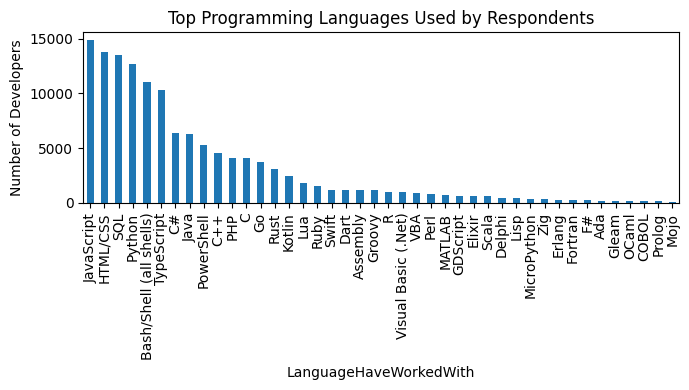

In [6]:
top_langs = (
    lang_df["LanguageHaveWorkedWith"]
    .value_counts()
)

plt.figure(figsize=(7, 4))
top_langs.plot(kind="bar")
plt.title("Top Programming Languages Used by Respondents")
plt.ylabel("Number of Developers")
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig("../reports/figures/top_languages.png", dpi=150)
plt.show()

#### Observations
- Four top languages (JS, HTML/CSS, SQL, Python) account for almost half of the developers. This trend suggests that database relevant applications are dominating the market.

#### Question 2: Which programming language has been used for longest experience?
- To answer this question, a bar chart is created to rank average years of coding experience across different languages.

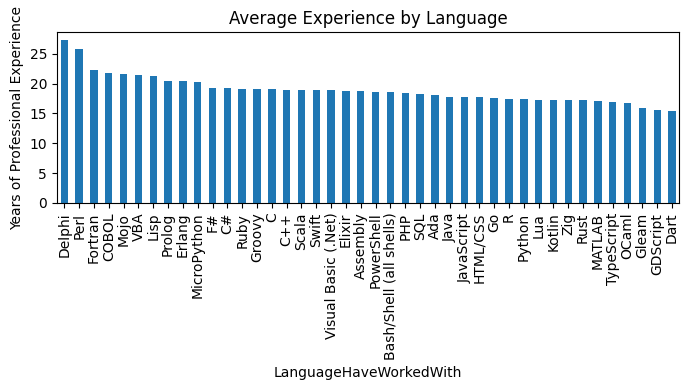

In [7]:
lang_exp = (
    lang_df.groupby("LanguageHaveWorkedWith")["YearsCode"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(7, 4))
lang_exp.plot(kind="bar")
plt.title("Average Experience by Language")
plt.ylabel("Years of Professional Experience")
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig("../reports/figures/language_vs_experience.png", dpi=150)
plt.show()


#### Observations
- The Delphi and Perl have longer experience than others because they have longer history.
- All developers have almost 20 years coding experience no matter what language they are using.

#### Question 3: Which programming languages are paid highest?
- To answer this question, a bar chart is created to rank median salaries of different languages.

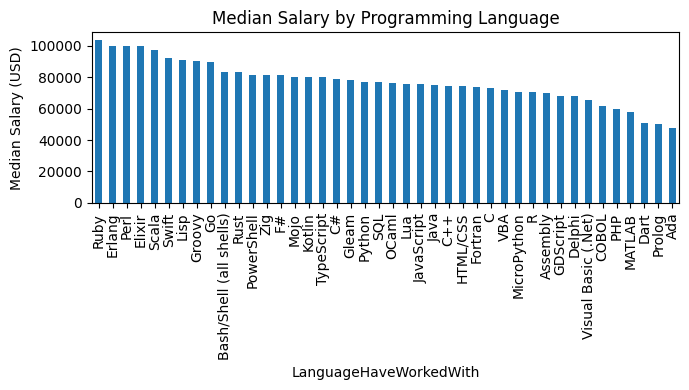

In [8]:
lang_salary = (
    lang_df.groupby("LanguageHaveWorkedWith")["ConvertedCompYearly"]
    .median()
    .sort_values(ascending=False)
)

lang_salary = lang_salary[lang_salary < 300_000]

plt.figure(figsize=(7, 4))
lang_salary.plot(kind="bar")
plt.title("Median Salary by Programming Language")
plt.ylabel("Median Salary (USD)")
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig("../reports/figures/language_vs_salary.png", dpi=150)
plt.show()


- For futher observation, a boxplot graph is created to illustrate salary distributions for different languages.

<Figure size 1400x600 with 0 Axes>

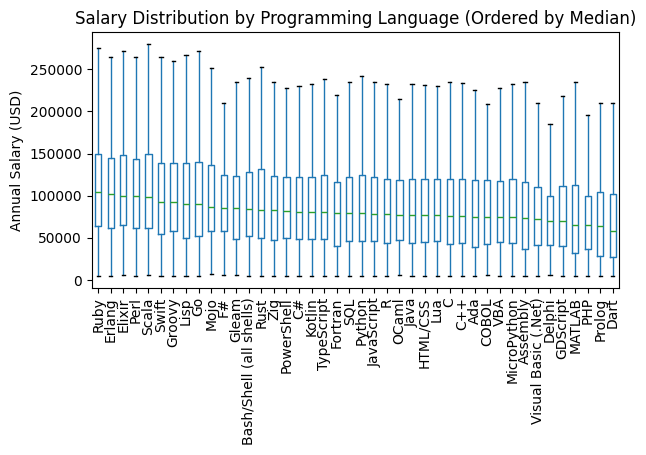

In [9]:
# Filter reasonable salary range
plot_df = lang_df[
    (lang_df["ConvertedCompYearly"] > 5_000) &
    (lang_df["ConvertedCompYearly"] < 300_000)
].copy()

# Compute median salary per language
median_salary = (
    plot_df
    .groupby("LanguageHaveWorkedWith")["ConvertedCompYearly"]
    .median()
    .sort_values(ascending=False)
)

# Reorder language column by median salary
plot_df["LanguageHaveWorkedWith"] = pd.Categorical(
    plot_df["LanguageHaveWorkedWith"],
    categories=median_salary.index,
    ordered=True
)

# Create boxplot
plt.figure(figsize=(14, 6))
plot_df.boxplot(
    column="ConvertedCompYearly",
    by="LanguageHaveWorkedWith",
    showfliers=False,
    grid=False
)

plt.title("Salary Distribution by Programming Language (Ordered by Median)")
plt.suptitle("")
plt.ylabel("Annual Salary (USD)")
plt.xlabel("")
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig("../reports/figures/language_salary_distribution_ordered.png", dpi=150)
plt.show()


#### Observations
- Language Ruby showed highest median salary, followed by Erlang, Elixir, Perl and Scala. It is interesting that they are not popular languages. It is possibly due to high demand in specific industry, such as finance, telecommunication.

### Conclusions

- Four top languages (JS, HTML/CSS, SQL, Python) account for almost half of the developers. This trend suggests that database relevant applications are dominating the market.
- The Delphi and Perl have longer experience than others because they have longer history.
- All developers have almost 20 years coding experience no matter what language they are using.
- Language Ruby showed highest median salary, followed by Erlang, Elixir, Perl and Scala. It is interesting that they are not popular languages. It is possibly due to high demand in specific industry, such as finance, telecommunication.

### Limitations
- Self-reported data could be biased
- Normalized counts by respondent
- Excluded missing values